In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Cargar el dataset
dataset = pd.read_csv('datos_entrenamiento.csv')  # Asegúrate de reemplazar 'tu_dataset.csv' con el nombre de tu archivo

# Dividir los datos en características (X) y etiquetas (y)
X = dataset[['PosX', 'PosY']]
y = dataset[['Muslo', 'Rodilla']]

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

Error Cuadrático Medio (MSE): 0.08862866172993711
Coeficiente de Determinación (R^2): 0.8138865157568491


Epoch 1/25
88/88 - 1s - loss: 0.9902 - val_loss: 0.8292 - 651ms/epoch - 7ms/step
Epoch 2/25
88/88 - 0s - loss: 0.8172 - val_loss: 0.7946 - 108ms/epoch - 1ms/step
Epoch 3/25
88/88 - 0s - loss: 0.7920 - val_loss: 0.7848 - 110ms/epoch - 1ms/step
Epoch 4/25
88/88 - 0s - loss: 0.7854 - val_loss: 0.7900 - 106ms/epoch - 1ms/step
Epoch 5/25
88/88 - 0s - loss: 0.7798 - val_loss: 0.7826 - 106ms/epoch - 1ms/step
Epoch 6/25
88/88 - 0s - loss: 0.7809 - val_loss: 0.7837 - 106ms/epoch - 1ms/step
Epoch 7/25
88/88 - 0s - loss: 0.7799 - val_loss: 0.7796 - 106ms/epoch - 1ms/step
Epoch 8/25
88/88 - 0s - loss: 0.7796 - val_loss: 0.7804 - 105ms/epoch - 1ms/step
Epoch 9/25
88/88 - 0s - loss: 0.7790 - val_loss: 0.7826 - 103ms/epoch - 1ms/step
Epoch 10/25
88/88 - 0s - loss: 0.7806 - val_loss: 0.7791 - 105ms/epoch - 1ms/step
Epoch 11/25
88/88 - 0s - loss: 0.7791 - val_loss: 0.7807 - 105ms/epoch - 1ms/step
Epoch 12/25
88/88 - 0s - loss: 0.7805 - val_loss: 0.7847 - 111ms/epoch - 1ms/step
Epoch 13/25
88/88 - 0s - 

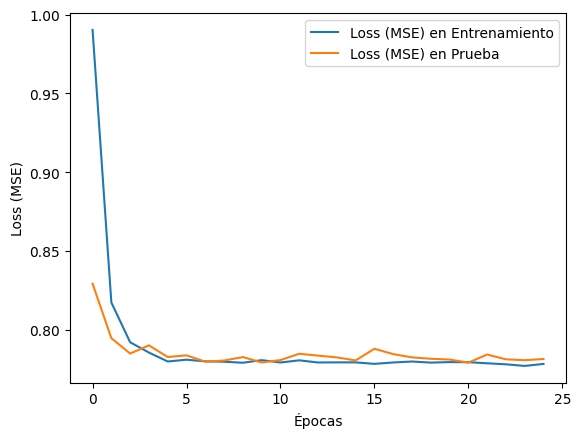

Epoch 1/25
11/11 - 1s - loss: 1.3902 - val_loss: 0.9835 - 800ms/epoch - 73ms/step
Epoch 2/25
11/11 - 0s - loss: 0.8945 - val_loss: 0.7001 - 35ms/epoch - 3ms/step
Epoch 3/25
11/11 - 0s - loss: 0.5641 - val_loss: 0.5045 - 35ms/epoch - 3ms/step
Epoch 4/25
11/11 - 0s - loss: 0.3503 - val_loss: 0.3685 - 37ms/epoch - 3ms/step
Epoch 5/25
11/11 - 0s - loss: 0.2565 - val_loss: 0.2851 - 37ms/epoch - 3ms/step
Epoch 6/25
11/11 - 0s - loss: 0.2145 - val_loss: 0.2325 - 34ms/epoch - 3ms/step
Epoch 7/25
11/11 - 0s - loss: 0.1828 - val_loss: 0.2020 - 38ms/epoch - 3ms/step
Epoch 8/25
11/11 - 0s - loss: 0.1546 - val_loss: 0.1753 - 38ms/epoch - 3ms/step
Epoch 9/25
11/11 - 0s - loss: 0.1307 - val_loss: 0.1435 - 36ms/epoch - 3ms/step
Epoch 10/25
11/11 - 0s - loss: 0.1053 - val_loss: 0.1100 - 35ms/epoch - 3ms/step
Epoch 11/25
11/11 - 0s - loss: 0.0849 - val_loss: 0.0904 - 35ms/epoch - 3ms/step
Epoch 12/25
11/11 - 0s - loss: 0.0667 - val_loss: 0.0717 - 33ms/epoch - 3ms/step
Epoch 13/25
11/11 - 0s - loss: 0.05

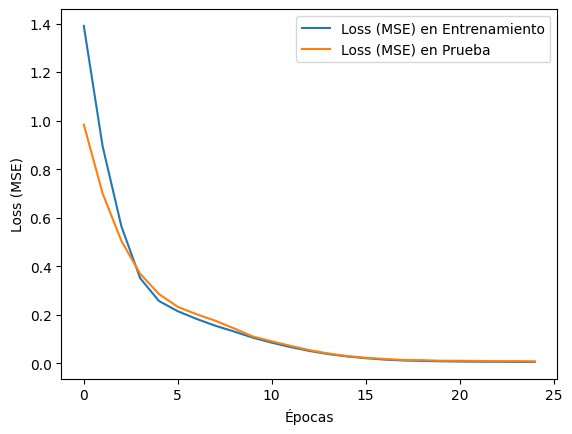

In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Cargar el dataset
#dataset = pd.read_csv('datos_entrenamiento2.csv')  # Asegúrate de reemplazar 'tu_dataset.csv' con el nombre de tu archivo
dataset = pd.read_csv('datos_entrena.csv')  # Asegúrate de reemplazar 'tu_dataset.csv' con el nombre de tu archivo

# Dividir los datos en características (X) y etiquetas (y)
X = dataset[['PosX', 'PosY']].values
y = dataset[['Muslo', 'Rodilla']].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos (escalar)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de Red Neuronal Artificial (RNA)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Dos salidas para Muslo y Rodilla
])

# Compilar el modelo
model.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Realizar predicciones en el conjunto de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Loss (MSE) en Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss (MSE) en Prueba')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

# Cargar el dataset
dataset2 = pd.read_csv('datos_entrenamiento2.csv')  # Asegúrate de reemplazar 'tu_dataset.csv' con el nombre de tu archivo
#dataset2 = pd.read_csv('datos_entrena.csv')  # Asegúrate de reemplazar 'tu_dataset.csv' con el nombre de tu archivo

# Dividir los datos en características (X) y etiquetas (y)
X = dataset2[['PosX', 'PosY']].values
y = dataset2[['Muslo', 'Rodilla']].values

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizar los datos (escalar)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Crear el modelo de Red Neuronal Artificial (RNA)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(2,)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2)  # Dos salidas para Muslo y Rodilla
])

# Compilar el modelo
model2.compile(optimizer='adam', loss='mean_squared_error')

# Entrenar el modelo
history = model2.fit(X_train, y_train, epochs=25, batch_size=64, validation_data=(X_test, y_test), verbose=2)

# Realizar predicciones en el conjunto de prueba
y_pred = model2.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R^2): {r2}")

# Visualizar la pérdida durante el entrenamiento
plt.plot(history.history['loss'], label='Loss (MSE) en Entrenamiento')
plt.plot(history.history['val_loss'], label='Loss (MSE) en Prueba')
plt.xlabel('Épocas')
plt.ylabel('Loss (MSE)')
plt.legend()
plt.show()

In [83]:
import numpy as np

def BuscarInterserccion(center, radius, line_slope, line_intercept):
    a = 1 + line_slope**2
    b = -2 * center[0] + 2 * line_slope * (line_intercept - center[1])
    c = center[0]**2 + (line_intercept - center[1])**2 - radius**2

    discriminant = b**2 - 4*a*c

    if discriminant < 0:
        return []  # No intersection points

    x1 = (-b + np.sqrt(discriminant)) / (2*a)
    x2 = (-b - np.sqrt(discriminant)) / (2*a)
    y1 = line_slope * x1 + line_intercept
    y2 = line_slope * x2 + line_intercept

    return [(x1, y1), (x2, y2)]

def CrearOvaloTrayectoriaCompleta(point1, point2, altura, frames):
    x1, y1 = point1
    x2, y2 = point2
    
    # Calcular el ancho y la altura utilizando los puntos dados
    if x1 > x2:
        width = x1*2
    elif x1 < x2:
        width = x2*2
    height = altura/2
    
    # Calcular el centro del óvalo
    center_x = (x1 + x2) / 2
    center_y = (y1 + y2) / 2
    
    # Generar el óvalo utilizando las dimensiones calculadas
    theta = np.linspace(0, 2 * np.pi, frames)
    x = center_x + width/2 * np.cos(theta)
    y = center_y + height/2 * np.sin(theta)
    
    return x, y

def Get_Mov(largo_extremidad, altura_actual, Frames):
    # Parámetros de la circunferencia y la recta
    center = (0, 0)
    radius = largo_extremidad * 2
    line_slope = 0
    #altura_actual = 0.3

    # Encontrar puntos de intersección
    intersection_points = BuscarInterserccion(center, radius, line_slope, altura_actual)

    # Puntos que definen el óvalo
    point1 = intersection_points[0]
    point2 = intersection_points[1]

    # Crear el óvalo que pasa por los puntos dados
    #                                               , altura)
    x, y = CrearOvaloTrayectoriaCompleta(point1, point2, altura_actual, Frames)

    mov_x = []
    mov_y = []
    for i in range(len(y)):
        if y[i] <= altura_actual: # Si es menor que la distancia del robot al piso se puede elevar la pata
            mov_x.append(x[i])
            mov_y.append(y[i])

    #--------------------------------------------------------
    #
    #       aGREGAR EL ARRASTE, LA LINEA RECTA
    #
    #--------------------------------------------------------

    
    mitad = len(mov_y) // 2
    
    aux1 = [altura_actual for i in range(len(mov_y))]
    
    aux1 = aux1[mitad:]
    aux1_1 = aux1[:mitad]
    
    # Elimina el primer elemento del arreglo para evitar un mal comportamiento
    mov_y = mov_y[1:]
    mov_y = aux1 + mov_y + aux1_1
    aux1 = np.linspace(mov_x[len(mov_x)-1], mov_x[1], len(mov_x))
    
    # Asocia la mitad del arraste, para antes y despues de la trayectoria
    aux2 = aux1[:mitad]
    aux3 = aux1[mitad:]
    
    # Elimina el primer elemento del arreglo para evitar un mal comportamiento
    mov_x = mov_x[1:]
    mov_x = np.concatenate((aux3,mov_x))
    mov_x = np.concatenate((mov_x,aux2))
    #print("largo de MOV_X = ", len(mov_x))
    #print("largo de MOV_Y = ", len(mov_y))
    return mov_x, mov_y

In [49]:

def LimpiezaIndividial(mov_x,mov_y):
    df = pd.DataFrame({'mov_x': mov_x, 'mov_y': mov_y})
    differences = df.diff()
    fila_mayor_diferencia = differences.abs().sum(axis=1).idxmax()

    # Imprimir la fila antes de la multiplicación
    #print(df.iloc[fila_mayor_diferencia-1])
    print(fila_mayor_diferencia)

    # Multiplicar el valor de 'mov_y' por -1
    df.at[fila_mayor_diferencia, 'mov_y'] *= -1
    mov_y = df['mov_y'].values
    mov_x = df['mov_x'].values
    coordenadas = list(zip(mov_y, mov_x))
    return coordenadas

In [23]:
#import numpy as np
#import matplotlib.pyplot as plt
#import sympy as sp
#import pandas as pd

#-------------------------------------------------------------------------
#
#                       Funciones de la trayectoria
#
#-------------------------------------------------------------------------

def symTfromDH(theta, d, a, alpha):
    # theta y alpha en radianes
    # d y a en metros
    Rz = sp.Matrix([[sp.cos(theta), -sp.sin(theta), 0, 0],
                   [sp.sin(theta), sp.cos(theta), 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    tz = sp.Matrix([[1, 0, 0, 0],
                   [0, 1, 0, 0],
                   [0, 0, 1, d],
                   [0, 0, 0, 1]])
    ta = sp.Matrix([[1, 0, 0, a],
                   [0, 1, 0, 0],
                   [0, 0, 1, 0],
                   [0, 0, 0, 1]])
    Rx = sp.Matrix([[1, 0, 0, 0],
                   [0, sp.cos(alpha), -sp.sin(alpha), 0],
                   [0, sp.sin(alpha), sp.cos(alpha), 0],
                   [0, 0, 0, 1]])
    T = Rz*tz*ta*Rx
    return T



def find_intersection_points(center, radius, line_slope, line_intercept):
    a = 1 + line_slope**2
    b = -2 * center[0] + 2 * line_slope * (line_intercept - center[1])
    c = center[0]**2 + (line_intercept - center[1])**2 - radius**2

    discriminant = b**2 - 4*a*c

    if discriminant < 0:
        return []  # No intersection points

    x1 = (-b + np.sqrt(discriminant)) / (2*a)
    x2 = (-b - np.sqrt(discriminant)) / (2*a)
    y1 = line_slope * x1 + line_intercept
    y2 = line_slope * x2 + line_intercept

    return [(x1, y1), (x2, y2)]

def create_oval_through_points(point1, point2, altura, frames):
    x1, y1 = point1
    x2, y2 = point2
    
    # Calcular el ancho y la altura utilizando los puntos dados
    if x1 > x2:
        width = x1*2
    elif x1 < x2:
        width = x2*2
    height = altura/2
    
    # Calcular el centro del óvalo
    center_x = (x1 + x2) / 2
    center_y = (y1 + y2) / 2
    
    # Generar el óvalo utilizando las dimensiones calculadas
    theta = np.linspace(0, 2 * np.pi, frames)
    x = center_x + width/2 * np.cos(theta)
    y = center_y + height/2 * np.sin(theta)
    
    return x, y

def Get_Value(mov_x,mov_y,largo_extremidad):
    #largo_extremidad = 0.2
    q1 = sp.symbols('q1')
    q2 = sp.symbols('q2')

    T = sp.simplify(symTfromDH(q1, 0, largo_extremidad, 0)* symTfromDH(q2, 0, largo_extremidad, 0))
    
    df = pd.DataFrame(columns=['Muslo', 'Rodilla'])
    
    if len(mov_x) != len(mov_y):
        return print("Dimensiones de mov_x y mov_y no coinsiden",len(mov_x) ,len(mov_y))
    
    for i in range(len(mov_y)):
        a=mov_y[i]
        b=mov_x[i]
        # definimos las ecuaciones a resolver
        ec1, ec2 = T[3]-a, T[7]-b
        (ec1, ec2)
        # ahora resolvemos la ecuación utilizando nsolve()
        try:
            q = sp.nsolve((ec1, ec2),(q1,q2),(1,-1), prec=6)
            df.loc[len(df)] = {'Muslo': q[0], 'Rodilla': q[1]-1.5}
        except:
            print(a,b)
            print("no se pudo calcular")
            q = [0, 0, 0]
            
    filtro_1 = df['Muslo'] <= -3.5 # Borrar
    filtro_2 = df['Muslo'] >= 3.5 # Borrar

    df2 = df.drop(df[filtro_1].index)
    df2 = df2.drop(df[filtro_2].index)
    
    filtro_3 = df2['Rodilla'] <= -3 # Borrar
    
    df2 = df2.drop(df2[filtro_3].index)
    
    # Limpieza del primer y último dato para evitar comportamiento extraño
    df2 = df2.drop([0, len(df2)-1])
    
    return df2


#-------------------------------------------------------------------------
#
#                       Parametrización
#
#------------------------------------------------------------------------

# Descripción de Denavit-Hartenberg (a = largo de la extremidad (en metros))
#      theta     |      d      |      a      |    alpha
# ----------------------------------------------------------
#       q1             0             0.2            0
#       q2             0             0.2            0

def Get_Mov2(largo_extremidad, altura_actual, Frames):
    # Parámetros de la circunferencia y la recta
    center = (0, 0)
    radius = largo_extremidad * 2
    line_slope = 0
    #altura_actual = 0.3

    # Encontrar puntos de intersección
    intersection_points = find_intersection_points(center, radius, line_slope, altura_actual)

    # Puntos que definen el óvalo
    point1 = intersection_points[0]
    point2 = intersection_points[1]

    # Crear el óvalo que pasa por los puntos dados
    #                                               , altura)
    x, y = create_oval_through_points(point1, point2, altura_actual, Frames)

    mov_x = []
    mov_y = []
    for i in range(len(y)):
        if y[i] <= altura_actual: # Si es menor que la distancia del robot al piso se puede elevar la pata
            mov_x.append(x[i])
            mov_y.append(y[i])

    #--------------------------------------------------------
    #
    #       aGREGAR EL ARRASTE, LA LINEA RECTA
    #
    #--------------------------------------------------------

    
    mitad = len(mov_y) // 2
    aux1 = [altura_actual for i in range(len(mov_y))]
    mov_y = aux1[mitad:] + mov_y + aux1[:mitad]
    aux1 = np.linspace(mov_x[len(mov_x)-1], mov_x[1], len(mov_x))
    aux2 = aux1[:mitad]
    aux3 = aux1[mitad:]
    mov_x = np.concatenate((aux3,mov_x))
    mov_x = np.concatenate((mov_x,aux2))

    return Get_Value(mov_x,mov_y,largo_extremidad)

def Pierna_Delantera_Izquierda(df, velocidad):
    while Run:
        for index, row in df.iterrows():
            retCode = sim.simxSetJointTargetPosition(clientID, muslo1, row['Muslo'], sim.simx_opmode_oneshot)
            retCode = sim.simxSetJointTargetPosition(clientID, rodilla1, row['Rodilla'], sim.simx_opmode_oneshot)
            time.sleep(velocidad) #delay entre cada movimiento ejemplo: 0.001

def Pierna_Delantera_Derecha(df, velocidad):
    while Run:
        for index, row in df.iterrows():
            retCode = sim.simxSetJointTargetPosition(clientID, muslo4, row['Muslo'], sim.simx_opmode_oneshot)
            retCode = sim.simxSetJointTargetPosition(clientID, rodilla4, row['Rodilla'], sim.simx_opmode_oneshot)
            time.sleep(velocidad) #delay entre cada movimiento ejemplo: 0.001
    
def Pierna_Tracera_Izquierda(df, velocidad):
    while Run:
        for index, row in df.iterrows():
            retCode = sim.simxSetJointTargetPosition(clientID, muslo2, row['Muslo'], sim.simx_opmode_oneshot)
            retCode = sim.simxSetJointTargetPosition(clientID, rodilla2, row['Rodilla'], sim.simx_opmode_oneshot)
            time.sleep(velocidad) #delay entre cada movimiento ejemplo: 0.001
        
def Pierna_Tracera_Derecha(df, velocidad):
    while Run:
        for index, row in df.iterrows():
            retCode = sim.simxSetJointTargetPosition(clientID, muslo3, row['Muslo'], sim.simx_opmode_oneshot)
            retCode = sim.simxSetJointTargetPosition(clientID, rodilla3, row['Rodilla'], sim.simx_opmode_oneshot)
            time.sleep(velocidad) #delay entre cada movimiento ejemplo: 0.001

def esperar_input(time_stop):
    global Run
    while not keyboard.is_pressed('w'):
        pass
    time.sleep(time_stop)
    Run = False
    
def MovimientoTotal(orden, delay_mov, delay_hilo,time_stop):
    global Run
    Run = True
    funciones = [Pierna_Delantera_Izquierda, Pierna_Tracera_Izquierda, Pierna_Delantera_Derecha, Pierna_Tracera_Derecha]
    hilos = []
    for i in range(4):
        hilo = thr.Thread(target=funciones[i], args=(orden,delay_mov))
        hilos.append(hilo)

    hilo_1 = thr.Thread(target=esperar_input, args=(time_stop,))
    hilo_1.start()
    # Iniciar los hilos
    for hilo in hilos:
        hilo.start()
        time.sleep(delay_hilo)

    hilo_1.join(timeout=0.01)

        # Esperar a que los hilos terminen
    for hilo in hilos:
        hilo.join(timeout=0.01)

4/4 [==============================] - 0s 1ms/step


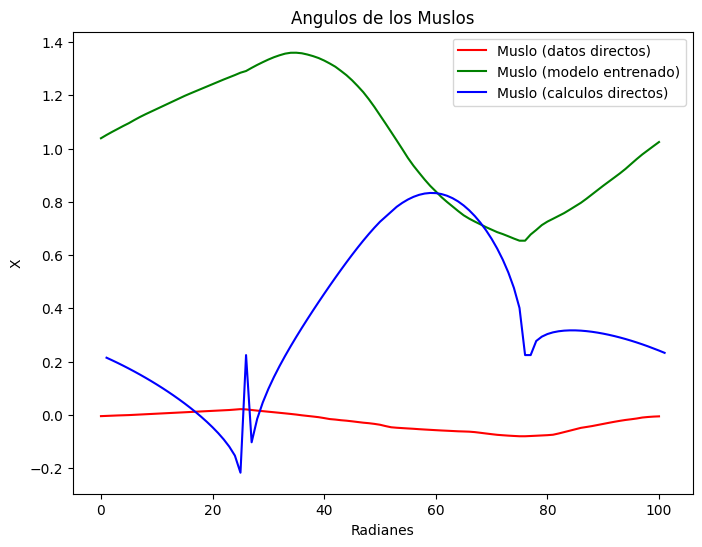

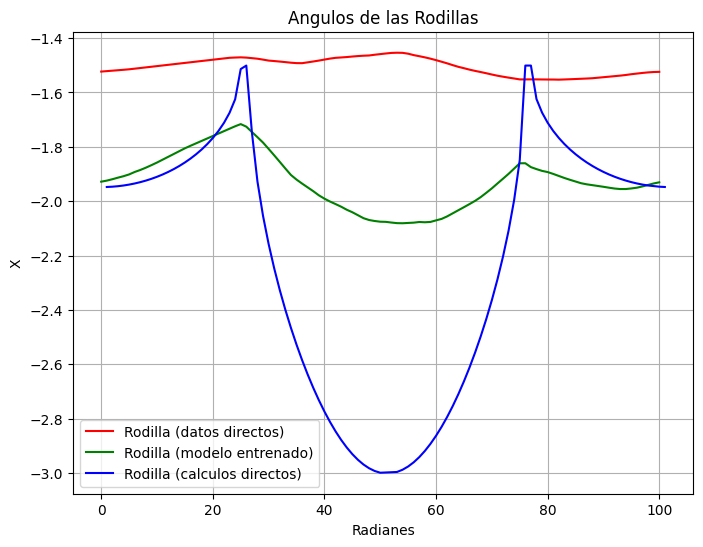

In [25]:
mov_x , mov_y = Get_Mov(0.2,0.39,100,0.15)
retroceso = Get_Mov2(0.2,0.39,100) # levanta y arrastra
#coordenadas = LimpiezaIndividial(mov_x , mov_y)
# Normalizar las coordenadas utilizando el mismo scaler que se usó durante el entrenamiento
coordenadas = list(zip(mov_y, mov_x))
coordenadas_normalizadas = scaler.transform(coordenadas)
prediccion = model.predict(coordenadas_normalizadas)
prediccion2 = model2.predict(coordenadas_normalizadas)

#plt.show()
#plt.figure(figsize=(8, 6))  # Tamaño del gráfico
#plt.plot(mov_x, 'ro', label='Coord X')  # Grupo 1 en rojo ('ro')
#plt.plot(mov_y, 'bo', label='Coord Y')  # Grupo 1 en rojo ('ro')
#plt.xlabel('Y')  # Etiqueta eje X
#plt.ylabel('X')  # Etiqueta eje Y
#plt.title('Coordenadas')  # Título del gráfico
#plt.legend()  # Mostrar leyenda

plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(prediccion[:, 0], 'r-', label='Muslo (modelo con datos directos)') 
plt.plot(prediccion2[:, 0], 'g-', label='Muslo (modelo con cinematica inversa)')
plt.plot(retroceso["Muslo"], 'b-', label='Muslo (calculos directos)') 
#plt.plot(prediccion[:, 1], 'bo', label='Rodilla')  # Grupo 1 en rojo ('ro')
plt.xlabel('Radianes')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Angulos de los Muslos')  # Título del gráfico
plt.legend()  # Mostrar leyenda

plt.figure(figsize=(8, 6))  # Tamaño del gráfico
#plt.plot(prediccion[:, 0], 'ro', label='Muslo')  # Grupo 1 en rojo ('ro')
plt.plot(prediccion[:, 1], 'r-', label='Rodilla (modelo con datos directos)')  
plt.plot(prediccion2[:, 1], 'g-', label='Rodilla (modelo con cinematica inversa)') 
plt.plot(retroceso["Rodilla"], 'b-', label='Rodilla (calculos directos)') 
plt.xlabel('Radianes')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Angulos de las Rodillas')  # Título del gráfico
plt.legend()  # Mostrar leyenda

""" plt.gca().invert_xaxis()  # Invertir eje X
plt.gca().invert_yaxis()  # Invertir eje Y """
# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()

In [35]:
coordenadas = list(zip(mov_y, mov_x))  # 
# Normalizar las coordenadas utilizando el mismo scaler que se usó durante el entrenamiento
coordenadas_normalizadas = scaler.transform(coordenadas)
prediccion = model.predict(coordenadas_normalizadas)

13/13 [==============================] - 0s 917us/step


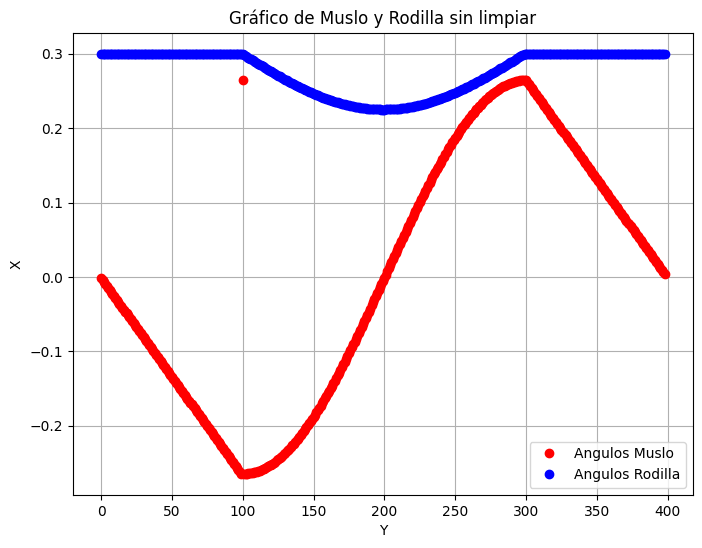

In [71]:
import matplotlib.pyplot as plt
# Extraer las columnas
x_values = prediccion[:, 0] # Muslo
y_values = prediccion[:, 1] # Rodilla

# Para restarle los 90° que molestan, de dajr bien
x_values -= 1.5


# Mostrar el gráfico
plt.show()
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(mov_x, 'ro', label='Angulos Muslo')  # Grupo 1 en rojo ('ro')
plt.plot(mov_y, 'bo', label='Angulos Rodilla')  # Grupo 1 en rojo ('ro')
plt.xlabel('Y')  # Etiqueta eje X
plt.ylabel('X')  # Etiqueta eje Y
plt.title('Gráfico de Muslo y Rodilla sin limpiar')  # Título del gráfico
plt.legend()  # Mostrar leyenda
""" plt.gca().invert_xaxis()  # Invertir eje X
plt.gca().invert_yaxis()  # Invertir eje Y """
# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()

In [ ]:
prediccion

In [85]:
import sim
import numpy as np
import sympy as sp
import pandas as pd
import time
import threading as thr
import keyboard


def connect(port):
# Establece la conexión a CoppeliaSim
# port debe coincidir con el puerto de conexión en VREP
# retorna el número de cliente o -1 si no puede establecer conexión
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID

# Conectarse al servidor de VREP
# *** ejecutar cada vez que se reinicia la simulación ***
clientID = connect(19999)

retCode,Dummy=sim.simxGetObjectHandle(clientID,'Dummy',sim.simx_opmode_blocking)
retCode,joint1=sim.simxGetObjectHandle(clientID,'joint1',sim.simx_opmode_blocking)
retCode,joint2=sim.simxGetObjectHandle(clientID,'joint2',sim.simx_opmode_blocking)

retCode,muslo1=sim.simxGetObjectHandle(clientID,'muslo1',sim.simx_opmode_blocking)
retCode,rodilla1=sim.simxGetObjectHandle(clientID,'rodilla1',sim.simx_opmode_blocking)

retCode,muslo2=sim.simxGetObjectHandle(clientID,'muslo2',sim.simx_opmode_blocking)
retCode,rodilla2=sim.simxGetObjectHandle(clientID,'rodilla2',sim.simx_opmode_blocking)

retCode,muslo3=sim.simxGetObjectHandle(clientID,'muslo3',sim.simx_opmode_blocking)
retCode,rodilla3=sim.simxGetObjectHandle(clientID,'rodilla3',sim.simx_opmode_blocking)

retCode,muslo4=sim.simxGetObjectHandle(clientID,'muslo4',sim.simx_opmode_blocking)
retCode,rodilla4=sim.simxGetObjectHandle(clientID,'rodilla4',sim.simx_opmode_blocking)


conectado a 19999


In [88]:
x_values = prediccion[:, 0]
y_values = prediccion[:, 1]
#x_values -= 1.5 

for i in range(len(x_values)):
    retCode = sim.simxSetJointTargetPosition(clientID, joint1, x_values[i], sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, joint2, y_values[i], sim.simx_opmode_oneshot)
    time.sleep(0.001) #delay entre cada movimiento ejemplo: 0.001

In [51]:
# Crear un csv con la prediccion para revision manual
data = np.column_stack((prediccion[:, 0], prediccion[:, 1]))

# Crear un DataFrame de Pandas
df = pd.DataFrame(data, columns=['X', 'Y'])

# Guardar el DataFrame en un archivo CSV
df.to_csv('analisis_entrenado.csv', index=False)

In [12]:
x_values[0]

0.79516983

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


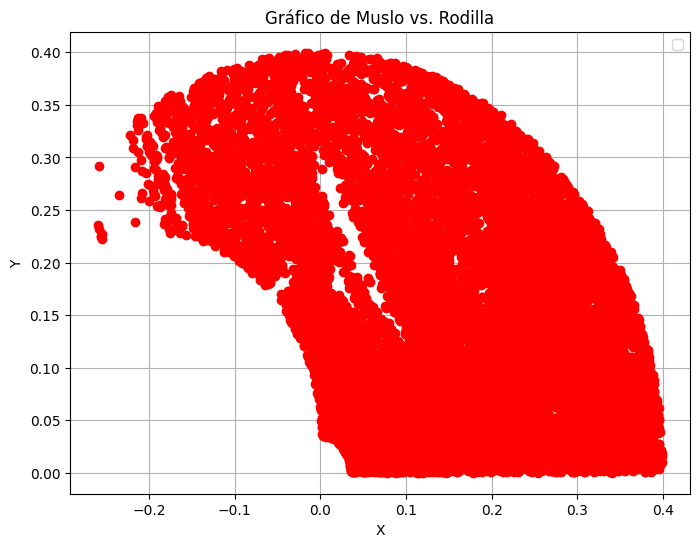

In [9]:
import pandas as pd
import matplotlib.pyplot as plt


# Cargar el dataset
dataset = pd.read_csv('datos_entrenamiento.csv')  # Asegúrate de reemplazar 'tu_dataset.csv' con el nombre de tu archivo


# Crea el gráfico con dos colores diferentes
plt.figure(figsize=(8, 6))  # Tamaño del gráfico
plt.plot(dataset['PosY'], dataset['PosX'], 'ro')  # Grupo 1 en rojo ('ro')
plt.xlabel('X')  # Etiqueta eje X
plt.ylabel('Y')  # Etiqueta eje Y
plt.title('Gráfico de Muslo vs. Rodilla')  # Título del gráfico
plt.legend()  # Mostrar leyenda

# Muestra el gráfico
plt.grid(True)  # Agregar cuadrícula
plt.show()

In [4]:
import sim
import numpy as np
import sympy as sp
import pandas as pd
import time
import threading as thr
import keyboard
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import sklearn
def connect(port):
# Establece la conexión a CoppeliaSim
# port debe coincidir con el puerto de conexión en VREP
# retorna el número de cliente o -1 si no puede establecer conexión
    sim.simxFinish(-1) # just in case, close all opened connections
    clientID=sim.simxStart('127.0.0.1',port,True,True,2000,5) # Conectarse
    if clientID == 0: print("conectado a", port)
    else: print("no se pudo conectar")
    return clientID

# Conectarse al servidor de VREP
# *** ejecutar cada vez que se reinicia la simulación ***
clientID = connect(19999)

retCode,Dummy=sim.simxGetObjectHandle(clientID,'Dummy',sim.simx_opmode_blocking)
retCode,joint1=sim.simxGetObjectHandle(clientID,'joint1',sim.simx_opmode_blocking)
retCode,joint2=sim.simxGetObjectHandle(clientID,'joint2',sim.simx_opmode_blocking)

retCode,muslo1=sim.simxGetObjectHandle(clientID,'muslo1',sim.simx_opmode_blocking)
retCode,rodilla1=sim.simxGetObjectHandle(clientID,'rodilla1',sim.simx_opmode_blocking)

retCode,muslo2=sim.simxGetObjectHandle(clientID,'muslo2',sim.simx_opmode_blocking)
retCode,rodilla2=sim.simxGetObjectHandle(clientID,'rodilla2',sim.simx_opmode_blocking)

retCode,muslo3=sim.simxGetObjectHandle(clientID,'muslo3',sim.simx_opmode_blocking)
retCode,rodilla3=sim.simxGetObjectHandle(clientID,'rodilla3',sim.simx_opmode_blocking)

retCode,muslo4=sim.simxGetObjectHandle(clientID,'muslo4',sim.simx_opmode_blocking)
retCode,rodilla4=sim.simxGetObjectHandle(clientID,'rodilla4',sim.simx_opmode_blocking)

def BuscarInterserccion(center, radius, line_slope, line_intercept):
    a = 1 + line_slope**2
    b = -2 * center[0] + 2 * line_slope * (line_intercept - center[1])
    c = center[0]**2 + (line_intercept - center[1])**2 - radius**2

    discriminant = b**2 - 4*a*c

    if discriminant < 0:
        return []  # No intersection points

    x1 = (-b + np.sqrt(discriminant)) / (2*a)
    x2 = (-b - np.sqrt(discriminant)) / (2*a)
    y1 = line_slope * x1 + line_intercept
    y2 = line_slope * x2 + line_intercept

    return [(x1, y1), (x2, y2)]

def CrearOvaloTrayectoriaCompleta(point1, point2, distancia_a_piso, frames, levantamiento_trayectoria):
    x1, y1 = point1
    x2, y2 = point2
    
    # Calcular el ancho y la altura utilizando los puntos dados
    if x1 > x2:
        width = x1*2
    elif x1 < x2:
        width = x2*2
    height = distancia_a_piso/5
    
    # Calcular el centro del óvalo
    center_x = (x1 + x2) / 2
    center_y = (y1 + y2) / 2
    
    # Generar el óvalo utilizando las dimensiones calculadas
    theta = np.linspace(0, 2 * np.pi, frames)
    x = center_x + width/2 * np.cos(theta)
    y = center_y + height/2 * np.sin(theta)
    return x, y

def Get_Mov(largo_extremidad, altura_actual, Frames, levantamiento_trayectoria):
    # Parámetros de la circunferencia y la recta
    center = (0, 0)
    radius = largo_extremidad * 2
    line_slope = 0
    #altura_actual = 0.3

    # Encontrar puntos de intersección
    intersection_points = BuscarInterserccion(center, radius, line_slope, altura_actual)

    # Puntos que definen el óvalo
    point1 = intersection_points[0]
    point2 = intersection_points[1]

    # Crear el óvalo que pasa por los puntos dados
    #                                               , altura)
    x, y = CrearOvaloTrayectoriaCompleta(point1, point2, altura_actual, Frames, levantamiento_trayectoria)

    mov_x = []
    mov_y = []
    for i in range(len(y)):
        if y[i] <= altura_actual: # Si es menor que la distancia del robot al piso se puede elevar la pata
            mov_x.append(x[i])
            mov_y.append(y[i])

    #--------------------------------------------------------
    #
    #       aGREGAR EL ARRASTE, LA LINEA RECTA
    #
    #--------------------------------------------------------

    
    mitad = len(mov_y) // 2
    
    aux1 = [altura_actual for i in range(len(mov_y))]

    aux1 = aux1[mitad:]
    aux1_1 = aux1[:mitad]
    
    # Elimina el primer elemento del arreglo para evitar un mal comportamiento
    mov_y = mov_y[1:]
    mov_y = aux1 + mov_y + aux1_1
    aux1 = np.linspace(mov_x[len(mov_x)-1], mov_x[1], len(mov_x))
    
    # Asocia la mitad del arraste, para antes y despues de la trayectoria
    aux2 = aux1[:mitad]
    aux3 = aux1[mitad:]
    
    # Elimina el primer elemento del arreglo para evitar un mal comportamiento
    mov_x = mov_x[1:]
    mov_x = np.concatenate((aux3,mov_x))
    mov_x = np.concatenate((mov_x,aux2))
    #print("largo de MOV_X = ", len(mov_x))
    #print("largo de MOV_Y = ", len(mov_y))
    mov_y = [y - levantamiento_trayectoria for y in mov_y]
    return mov_x, mov_y

def GraficarTrayectoria(mov_x,mov_y):
    theta = np.linspace(0, np.pi, 100)
    radius = 0.4
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)

    # Dibujar el semicírculo

    plt.figure(figsize=(8, 6))  # Tamaño del gráfico
    plt.plot(mov_x,mov_y, 'ro', label='Trayectoria')  # Grupo 1 en rojo ('ro')
    plt.plot(x, y, 'g-', label='Alcance del extremo')
    plt.plot(0, 0, 'co', label='Muslo')

    # Convertir coordenadas polares a coordenadas cartesianas
    x = 0.2 * np.cos(theta)
    y = 0.2  * np.sin(theta)

    # Trasladar el semicírculo a la posición deseada
    x += 0.2  # Ajusta la posición en el eje x según tus necesidades
    y +=  0 # Ajusta la posición en el eje y según tus necesidades

    
    plt.fill(x, y, color='black', label='Fuera de alcance')
    plt.xlabel('Y')  # Etiqueta eje X
    plt.ylabel('X')  # Etiqueta eje Y
    plt.title('Coordenadas Juntas')  # Título del gráfico
    plt.legend()  # Mostrar leyenda

    plt.xlim(-0.4, 0.4)
    plt.ylim(-0.4, 0.4)

    """ plt.gca().invert_xaxis()  # Invertir eje X """
    plt.gca().invert_yaxis()  # Invertir eje Y 
    # Muestra el gráfico
    plt.grid(True)  # Agregar cuadrícula
    plt.show()
    
def PredecirAngulos(mov_x, mov_y,modelo):
    coordenadas = list(zip(mov_y, mov_x))  # 
    # Normalizar las coordenadas utilizando el mismo scaler que se usó durante el entrenamiento
    coordenadas_normalizadas = scaler.transform(coordenadas)
    prediccion = modelo.predict(coordenadas_normalizadas)
    muslos_datos = prediccion[:, 0] # Muslo
    rodillas_datos = prediccion[:, 1] # Rodilla

    # Para restarle los 90° que molestan, de dejar bien
    #muslos_datos -= 1.5
    
    return muslos_datos,rodillas_datos

def PredecirPosicion(ang_x, ang_y,modelo):
    angulos = [[ang_y, ang_x]]  # 
    # Normalizar las coordenadas utilizando el mismo scaler que se usó durante el entrenamiento
    angulos_normalizados = scaler.transform(angulos)
    prediccion = modelo.predict(angulos_normalizados)
    x = prediccion[:, 0] # Muslo
    y = prediccion[:, 1] # Rodilla

    # Para restarle los 90° que molestan, de dejar bien
    #muslos_datos -= 1.5
    
    return x,y

def MoverBrazoPiso(x_values,y_values):
    if len(x_values) == len(y_values):
        for i in range(len(x_values)):
            retCode = sim.simxSetJointTargetPosition(clientID, joint1, x_values[i], sim.simx_opmode_oneshot) # Muslo
            retCode = sim.simxSetJointTargetPosition(clientID, joint2, y_values[i], sim.simx_opmode_oneshot) # Rodilla
            time.sleep(0.001) #delay entre cada movimiento ejemplo: 0.001
    else:
        print("La longitud de los arreglos no coinciden")
        
import time
tiempo_promedio = 0.0

def Pierna_Delantera_Izquierda(mov_muslo,mov_rodilla, velocidad):
    global tiempo_promedio
    total_time1 = 0.0
    for i in range(len(mov_muslo)):
        start_time1 = time.time()  
        retCode = sim.simxSetJointTargetPosition(
            clientID, muslo1, mov_muslo[i], sim.simx_opmode_oneshot
        )
        retCode = sim.simxSetJointTargetPosition(
            clientID, rodilla1, mov_rodilla[i], sim.simx_opmode_oneshot
        )
        time.sleep(0.001)  
        end_time1 = time.time()  
        elapsed_time1 = end_time1 - start_time1 
        total_time1 += elapsed_time1 
    
    tiempo_promedio = total_time1 / len(mov_muslo)  # Calcula el tiempo promedio por ciclo
    """ print(f"Tiempo promedio por ciclo en Pierna Delantera Izquierda: {tiempo_promedio1} segundos") """


def Pierna_Delantera_Derecha(mov_muslo,mov_rodilla, velocidad):
    global tiempo_promedio
    total_time2 = 0.0  # Inicializa el tiempo total en 0.0 segundos
    for i in range(len(mov_muslo)):
        start_time2 = time.time()  
        retCode = sim.simxSetJointTargetPosition(
            clientID, muslo4, mov_muslo[i], sim.simx_opmode_oneshot
        )
        retCode = sim.simxSetJointTargetPosition(
            clientID, rodilla4, mov_rodilla[i], sim.simx_opmode_oneshot
        )
        time.sleep(0.001)  
        end_time2 = time.time()  
        elapsed_time2 = end_time2 - start_time2 
        total_time2 += elapsed_time2 
    
    tiempo_promedio = total_time2 / len(mov_muslo)  # Calcula el tiempo promedio por ciclo
    """ print(f"Tiempo promedio por ciclo en Pierna Delantera Derecha: {tiempo_promedio2} segundos") """


def Pierna_Tracera_Izquierda(mov_muslo, mov_rodilla, velocidad):
    global tiempo_promedio
    total_time3 = 0.0  

    for i in range(len(mov_muslo)):
        start_time3 = time.time()  
        retCode = sim.simxSetJointTargetPosition(
            clientID, muslo2, mov_muslo[i], sim.simx_opmode_oneshot
        )
        retCode = sim.simxSetJointTargetPosition(
            clientID, rodilla2, mov_rodilla[i], sim.simx_opmode_oneshot
        )
        time.sleep(0.001)
        end_time3 = time.time()
        elapsed_time3 = end_time3 - start_time3  
        total_time3 += elapsed_time3 
    
    tiempo_promedio = total_time3 / len(mov_muslo)  # Calcula el tiempo promedio por ciclo
    """ print(f"Tiempo promedio por ciclo en Pierna Tracera Izquierda: {tiempo_promedio3} segundos") """


def Pierna_Tracera_Derecha(mov_muslo,mov_rodilla, velocidad):
    global tiempo_promedio
    total_time4 = 0.0  
    for i in range(len(mov_muslo)):
        start_time4 = time.time()  
        retCode = sim.simxSetJointTargetPosition(
            clientID, muslo3, mov_muslo[i], sim.simx_opmode_oneshot
        )
        retCode = sim.simxSetJointTargetPosition(
            clientID, rodilla3, mov_rodilla[i], sim.simx_opmode_oneshot
        )
        time.sleep(0.001)  # delay entre cada movimiento ejemplo: 0.001
        end_time4 = time.time()  # Registra el tiempo de finalización del ciclo
        elapsed_time4 = end_time4 - start_time4  # Calcula el tiempo de ejecución del ciclo
        total_time4 += elapsed_time4  # Agrega el tiempo del ciclo al tiempo total
    
    tiempo_promedio = total_time4 / len(mov_muslo)  # Calcula el tiempo promedio por ciclo
    """ print(f"Tiempo promedio por ciclo en Pierna Tracera Derecha: {tiempo_promedio4} segundos") """
    

import threading
import keyboard

def Avance(muslos_data,rodilla_data,velocidad):
    hilo1 = thr.Thread(target=Pierna_Delantera_Izquierda, args=(muslos_data,rodilla_data,0))
    hilo2 = thr.Thread(target=Pierna_Delantera_Derecha, args=(muslos_data,rodilla_data,0))
    hilo3 = thr.Thread(target=Pierna_Tracera_Izquierda, args=(muslos_data,rodilla_data,0))
    hilo4 = thr.Thread(target=Pierna_Tracera_Derecha, args=(muslos_data,rodilla_data,0))

    hilo2.start()
    hilo3.start()
    time.sleep(round(tiempo_promedio, 5)* (len(muslos_data)/2))
    #time.sleep(0.7)
    hilo1.start()
    hilo4.start()

    hilo2.join()
    hilo3.join()
    hilo1.join()
    hilo4.join()
    
    
    
def Retroceso(muslos_data,rodilla_data,velocidad):
    muslos_data = muslos_data[::-1]
    rodilla_data = rodilla_data[::-1]
    
    hilo1 = thr.Thread(target=Pierna_Delantera_Izquierda, args=(muslos_data,rodilla_data,0))
    hilo2 = thr.Thread(target=Pierna_Delantera_Derecha, args=(muslos_data,rodilla_data,0))
    hilo3 = thr.Thread(target=Pierna_Tracera_Izquierda, args=(muslos_data,rodilla_data,0))
    hilo4 = thr.Thread(target=Pierna_Tracera_Derecha, args=(muslos_data,rodilla_data,0))

    hilo2.start()
    hilo3.start()
    time.sleep(round(tiempo_promedio, 5)* (len(muslos_data)/2))
    #time.sleep(0.7)
    hilo1.start()
    hilo4.start()

    hilo2.join()
    hilo3.join()
    hilo1.join()
    hilo4.join()
    
def Sentarse():
    res, muslo_get = sim.simxGetJointPosition(clientID, muslo2, sim.simx_opmode_blocking)
    res, rodilla_get = sim.simxGetJointPosition(clientID, rodilla2, sim.simx_opmode_blocking)
    
    time.sleep(0.1)
    retCode = sim.simxSetJointTargetPosition(clientID, joint1, muslo_get, sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, joint2, rodilla_get, sim.simx_opmode_oneshot)
    time.sleep(0.1)

    res, dummy_posicion = sim.simxGetObjectPosition(clientID, Dummy, -1, sim.simx_opmode_blocking)
    dummy_posicion_truncada = [round(coord, 4) for coord in dummy_posicion]
    
    x, y, z = dummy_posicion_truncada
    agachado = [0.15 , 0]
    x_values = np.linspace(x, agachado[0], 100)
    y_values = np.linspace(y, agachado[1], 100)
    
    muslos_datos_sentarse , rodillas_datos_sentarse = PredecirAngulos(y_values, x_values,modeloInverso)

    hilo1 = thr.Thread(target=Pierna_Delantera_Izquierda, args=(muslos_datos_sentarse,rodillas_datos_sentarse,0))
    hilo2 = thr.Thread(target=Pierna_Delantera_Derecha, args=(muslos_datos_sentarse,rodillas_datos_sentarse,0))
    hilo3 = thr.Thread(target=Pierna_Tracera_Izquierda, args=(muslos_datos_sentarse,rodillas_datos_sentarse,0))
    hilo4 = thr.Thread(target=Pierna_Tracera_Derecha, args=(muslos_datos_sentarse,rodillas_datos_sentarse,0))
    hilo4.start()
    hilo3.start()
    hilo3.join()
    hilo4.join()
    
def PosicionInicial(movX,movY,velocidad):
    
    destino = [movX[0] , movY[0]]
    
    res, muslo_get = sim.simxGetJointPosition(clientID, muslo2, sim.simx_opmode_blocking)
    res, rodilla_get = sim.simxGetJointPosition(clientID, rodilla2, sim.simx_opmode_blocking)
    time.sleep(0.1)

    retCode = sim.simxSetJointTargetPosition(clientID, joint1, muslo_get, sim.simx_opmode_oneshot)
    retCode = sim.simxSetJointTargetPosition(clientID, joint2, rodilla_get, sim.simx_opmode_oneshot)
    time.sleep(0.1)
    res, dummy_position = sim.simxGetObjectPosition(clientID, Dummy, -1, sim.simx_opmode_blocking)
    dummy_position_truncated = [round(coord, 4) for coord in dummy_position]
    # Separar las coordenadas en variables individuales
    x, y, z = dummy_position_truncated
    x_values = np.linspace(x, destino[0], 100)
    y_values = np.linspace(y, destino[1], 100)
    
    muslos_datos_inicio , rodillas_datos_inicio = PredecirAngulos(y_values, x_values,modeloInverso)
    
    hilo1 = thr.Thread(target=Pierna_Delantera_Izquierda, args=(muslos_datos_inicio,rodillas_datos_inicio,0))
    hilo2 = thr.Thread(target=Pierna_Delantera_Derecha, args=(muslos_datos_inicio,rodillas_datos_inicio,0))
    hilo3 = thr.Thread(target=Pierna_Tracera_Izquierda, args=(muslos_datos_inicio,rodillas_datos_inicio,0))
    hilo4 = thr.Thread(target=Pierna_Tracera_Derecha, args=(muslos_datos_inicio,rodillas_datos_inicio,0))

    hilo2.start()
    hilo3.start()
    hilo1.start()
    hilo4.start()

    hilo2.join()
    hilo3.join()
    hilo1.join()
    hilo4.join()  

no se pudo conectar
